# Definição do problema


*   Previsão do uso de bicicletas




# Etapa 1: Importação das bibliotecas

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.9.1'

# Etapa 2: Importação da Base de dados

In [2]:
bike = pd.read_csv('MLs10a bike_sharing_daily.csv');

In [3]:
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


# Etapa 3: Limpeza da base de dados

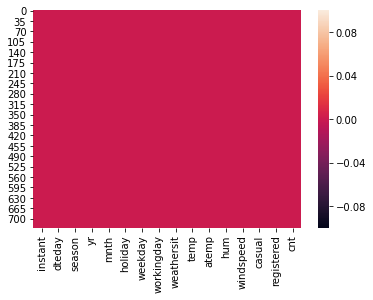

In [4]:
sns.heatmap(bike.isnull());

In [5]:
bike = bike.drop(labels=['instant'], axis=1)

In [6]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
bike = bike.drop(labels=['casual', 'registered'], axis = 1)

In [8]:
bike

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


In [9]:
bike.dteday = pd.to_datetime(bike.dteday, format = '%Y-%m-%d')

In [10]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [11]:
bike.index = pd.DatetimeIndex(bike.dteday)

In [12]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
dteday,,,,,,,,,,,,,
2011-01-01,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
2011-01-02,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2011-01-03,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
2011-01-04,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
2011-01-05,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [13]:
bike = bike.drop(labels=['dteday'], axis = 1)

In [14]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
dteday,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


# Etapa 4: Visualização da base de dados

Text(0, 0.5, 'Bike rental')

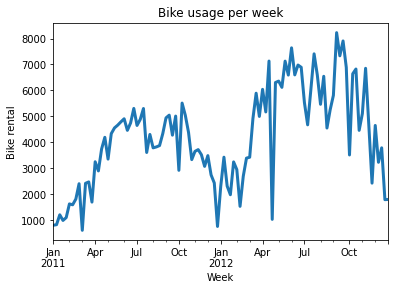

In [15]:
bike['cnt'].asfreq('W').plot(linewidth = 3)
plt.title('Bike usage per week')
plt.xlabel('Week')
plt.ylabel('Bike rental')

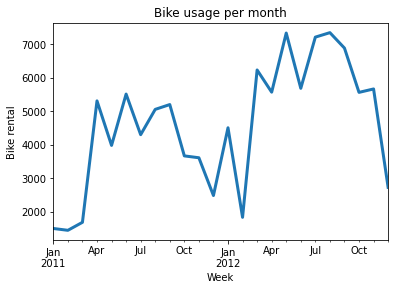

In [16]:
bike['cnt'].asfreq('M').plot(linewidth = 3)
plt.title('Bike usage per month')
plt.xlabel('Week')
plt.ylabel('Bike rental');

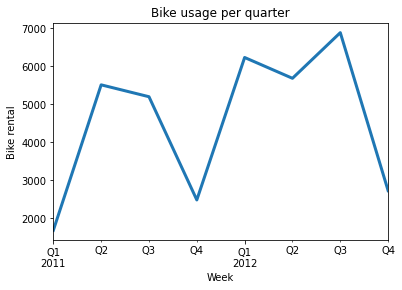

In [17]:
bike['cnt'].asfreq('Q').plot(linewidth = 3)
plt.title('Bike usage per quarter')
plt.xlabel('Week')
plt.ylabel('Bike rental');

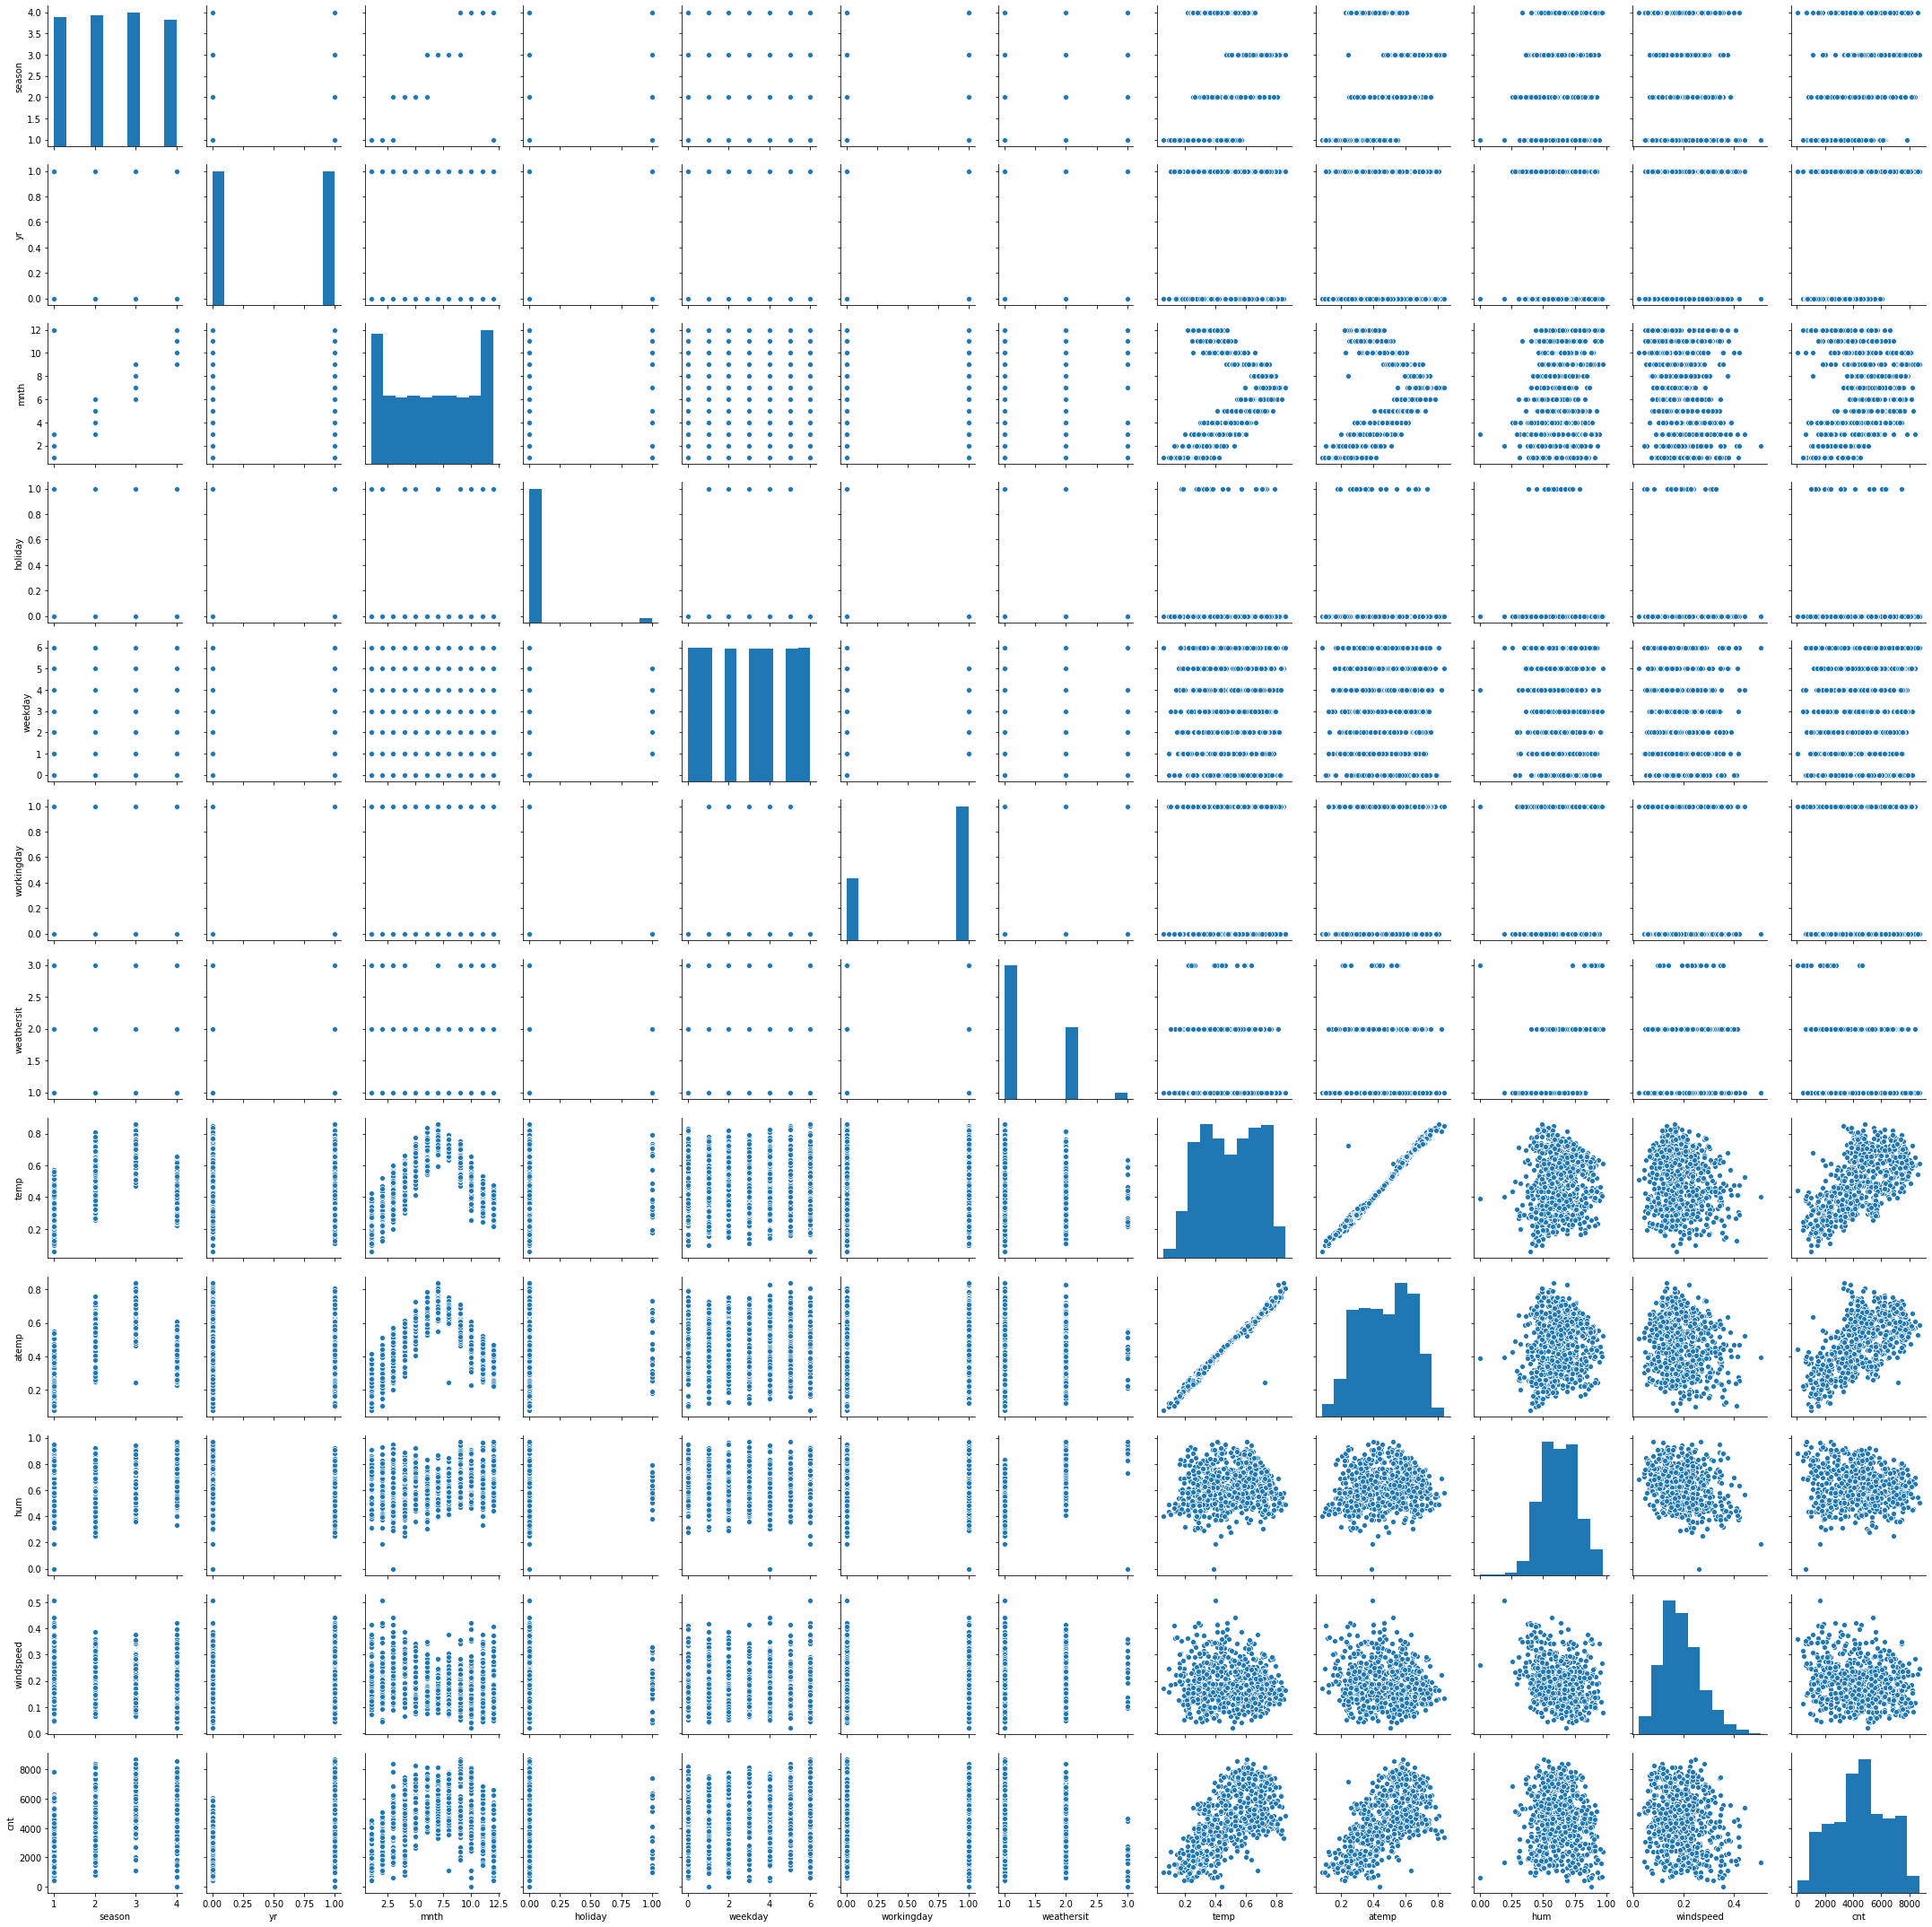

In [18]:
sns.pairplot(bike);

In [19]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
dteday,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [20]:
X_numerical = bike[['temp', 'hum','windspeed','cnt']]

In [21]:
X_numerical

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...
2012-12-27,0.254167,0.652917,0.350133,2114
2012-12-28,0.253333,0.590000,0.155471,3095
2012-12-29,0.253333,0.752917,0.124383,1341


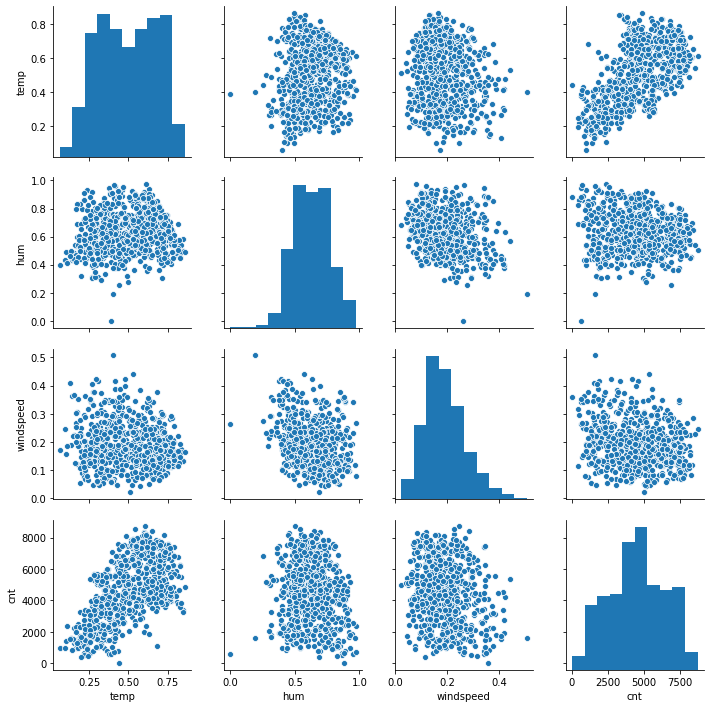

In [22]:
sns.pairplot(X_numerical)

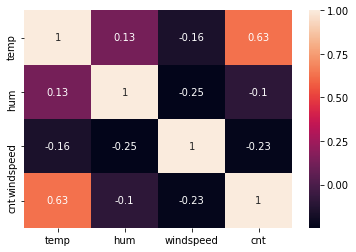

In [23]:
sns.heatmap(X_numerical.corr(), annot=True); #Matrix de correlação

# Etapa 5: Tratamento das base de dados

In [24]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
dteday,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [25]:
categories = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
X_cat = bike[categories] #variavel para definir os numeros categoricos

In [26]:
for column in categories:
    print(f"{column}: nunique {X_cat[column].nunique()}") 

season: nunique 4
yr: nunique 2
mnth: nunique 12
holiday: nunique 2
weekday: nunique 7
workingday: nunique 2
weathersit: nunique 3


In [27]:
X_cat.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
dteday,,,,,,,
2011-01-01,1,0,1,0,6,0,2
2011-01-02,1,0,1,0,0,0,2
2011-01-03,1,0,1,0,1,1,1
2011-01-04,1,0,1,0,2,1,1
2011-01-05,1,0,1,0,3,1,1


Domingo 0
Segunda 1

Domingo 0 1 0
Segunda 1 0 0
Terça   0 0 1

In [28]:
from sklearn.preprocessing import OneHotEncoder
onehotenconder = OneHotEncoder()
X_cat = onehotenconder.fit_transform(X_cat).toarray()

In [29]:
X_cat

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [30]:
X_cat.shape

(731, 32)

In [31]:
X_cat = pd.DataFrame(X_cat)

In [32]:
X_cat.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [33]:
X_numerical

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...
2012-12-27,0.254167,0.652917,0.350133,2114
2012-12-28,0.253333,0.590000,0.155471,3095
2012-12-29,0.253333,0.752917,0.124383,1341


In [34]:
X_numerical = X_numerical.reset_index()

In [35]:
X_numerical

,dteday,temp,hum,windspeed,cnt
0,2011-01-01,0.344167,0.805833,0.160446,985
1,2011-01-02,0.363478,0.696087,0.248539,801
2,2011-01-03,0.196364,0.437273,0.248309,1349
3,2011-01-04,0.200000,0.590435,0.160296,1562
4,2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...
726,2012-12-27,0.254167,0.652917,0.350133,2114
727,2012-12-28,0.253333,0.590000,0.155471,3095
728,2012-12-29,0.253333,0.752917,0.124383,1341
729,2012-12-30,0.255833,0.483333,0.350754,1796


In [36]:
X_all = pd.concat([X_cat, X_numerical], axis=1)

In [37]:
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,dteday,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2011-01-01,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2011-01-02,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-03,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-04,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-05,0.226957,0.436957,0.186900,1600


In [38]:
X_all = X_all.drop(labels=['dteday'], axis=1)

In [39]:
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.436957,0.186900,1600


In [40]:
X = X_all.iloc[:,:-1].values # pegar todos os valores menos o último (cnt)

In [41]:
Y = X_all.iloc[:,-1:].values # pegar apenas o último valor (cnt)

In [42]:
X.shape

(731, 35)

In [43]:
Y.shape

(731, 1)

In [44]:
X

array([[1.      , 0.      , 0.      , ..., 0.344167, 0.805833, 0.160446],
       [1.      , 0.      , 0.      , ..., 0.363478, 0.696087, 0.248539],
       [1.      , 0.      , 0.      , ..., 0.196364, 0.437273, 0.248309],
       ...,
       [1.      , 0.      , 0.      , ..., 0.253333, 0.752917, 0.124383],
       [1.      , 0.      , 0.      , ..., 0.255833, 0.483333, 0.350754],
       [1.      , 0.      , 0.      , ..., 0.215833, 0.5775  , 0.154846]])

In [45]:
Y

array([[ 985],
       [ 801],
       [1349],
       [1562],
       [1600],
       [1606],
       [1510],
       [ 959],
       [ 822],
       [1321],
       [1263],
       [1162],
       [1406],
       [1421],
       [1248],
       [1204],
       [1000],
       [ 683],
       [1650],
       [1927],
       [1543],
       [ 981],
       [ 986],
       [1416],
       [1985],
       [ 506],
       [ 431],
       [1167],
       [1098],
       [1096],
       [1501],
       [1360],
       [1526],
       [1550],
       [1708],
       [1005],
       [1623],
       [1712],
       [1530],
       [1605],
       [1538],
       [1746],
       [1472],
       [1589],
       [1913],
       [1815],
       [2115],
       [2475],
       [2927],
       [1635],
       [1812],
       [1107],
       [1450],
       [1917],
       [1807],
       [1461],
       [1969],
       [2402],
       [1446],
       [1851],
       [2134],
       [1685],
       [1944],
       [2077],
       [ 605],
       [1872],
       [21

In [46]:
#Normalizar o Y entre 0 e 1 = Base normalizada torna o processo de aprendizagem mais rápido
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Y = scaler.fit_transform(Y)

In [47]:
Y

array([[0.11079153],
       [0.08962264],
       [0.15266912],
       [0.17717441],
       [0.18154625],
       [0.18223654],
       [0.1711919 ],
       [0.10780028],
       [0.09203866],
       [0.14944777],
       [0.14277497],
       [0.13115509],
       [0.15922688],
       [0.1609526 ],
       [0.14104924],
       [0.13598711],
       [0.11251726],
       [0.07604694],
       [0.18729867],
       [0.21916705],
       [0.1749885 ],
       [0.11033134],
       [0.11090658],
       [0.16037736],
       [0.22583985],
       [0.05568339],
       [0.04705476],
       [0.13173033],
       [0.12379199],
       [0.1235619 ],
       [0.17015647],
       [0.15393465],
       [0.17303267],
       [0.17579383],
       [0.19397147],
       [0.1130925 ],
       [0.18419236],
       [0.19443166],
       [0.17349287],
       [0.18212149],
       [0.17441325],
       [0.1983433 ],
       [0.16682006],
       [0.18028072],
       [0.21755637],
       [0.20628164],
       [0.24079613],
       [0.282

# Etapa 6: Configuração da base de treinamento e teste

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2) #80% será base de treinamento e 20% será base de teste

In [49]:
X_train.shape

(584, 35)

In [50]:
X_test.shape

(147, 35)

# Etapa 7: Construção e treinamento do modelo

In [51]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=[35]))
model.add(tf.keras.layers.Dense(units=150, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3600      
                                                                 
 dense_1 (Dense)             (None, 150)               15150     
                                                                 
 dense_2 (Dense)             (None, 1)                 151       
                                                                 
Total params: 18,901
Trainable params: 18,901
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(optimizer='Adam', loss='mean_absolute_error')

In [54]:
epochs_hist = model.fit(X_train, Y_train, epochs=25, batch_size= 100, validation_split=0.2)

Epoch 1/25
5/5 [==============================] - 1s 70ms/step - loss: 0.2935 - val_loss: 0.2367
Epoch 2/25
5/5 [==============================] - 0s 15ms/step - loss: 0.2036 - val_loss: 0.1234
Epoch 3/25
5/5 [==============================] - 0s 16ms/step - loss: 0.1392 - val_loss: 0.1059
Epoch 4/25
5/5 [==============================] - 0s 20ms/step - loss: 0.1087 - val_loss: 0.0965
Epoch 5/25
5/5 [==============================] - 0s 14ms/step - loss: 0.0985 - val_loss: 0.0916
Epoch 6/25
5/5 [==============================] - 0s 13ms/step - loss: 0.0829 - val_loss: 0.0814
Epoch 7/25
5/5 [==============================] - 0s 11ms/step - loss: 0.0764 - val_loss: 0.0804
Epoch 8/25
5/5 [==============================] - 0s 13ms/step - loss: 0.0698 - val_loss: 0.0801
Epoch 9/25
5/5 [==============================] - 0s 12ms/step - loss: 0.0646 - val_loss: 0.0737
Epoch 10/25
5/5 [==============================] - 0s 11ms/step - loss: 0.0589 - val_loss: 0.0715
Epoch 11/25
5/5 [============

# Etapa 8: Avaliação do modelo

In [55]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

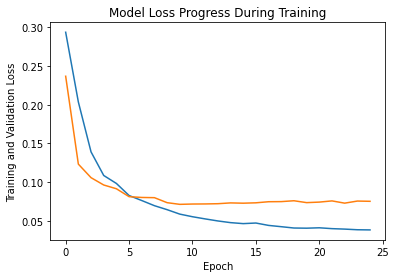

In [56]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss');

In [57]:
X_all

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.254167,0.652917,0.350133,2114
727,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.253333,0.590000,0.155471,3095
728,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.253333,0.752917,0.124383,1341
729,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.255833,0.483333,0.350754,1796


In [58]:
y_predict = model.predict(X_test)

5/5 [==============================] - 0s 1ms/step


In [59]:
y_predict

array([[0.91267776],
       [0.85021436],
       [0.734661  ],
       [0.36156124],
       [0.50779593],
       [0.47748175],
       [0.9072177 ],
       [0.63086116],
       [0.7582283 ],
       [0.7613855 ],
       [0.5761487 ],
       [0.33139527],
       [0.447087  ],
       [0.22299021],
       [0.6556002 ],
       [0.5901004 ],
       [0.7870749 ],
       [0.5359538 ],
       [0.67401063],
       [0.13446073],
       [0.3666674 ],
       [0.4135316 ],
       [0.67399913],
       [0.55355823],
       [0.62916374],
       [0.15772186],
       [0.5271571 ],
       [0.27456707],
       [0.97422165],
       [0.16405421],
       [0.7763347 ],
       [0.86025894],
       [0.5619161 ],
       [0.54928637],
       [0.57114464],
       [0.3167969 ],
       [0.661828  ],
       [0.89555633],
       [0.8057704 ],
       [0.51499796],
       [0.45158526],
       [0.79956967],
       [0.292334  ],
       [0.55119514],
       [0.30617398],
       [0.71787405],
       [0.9298037 ],
       [0.695

Text(0, 0.5, 'True values')

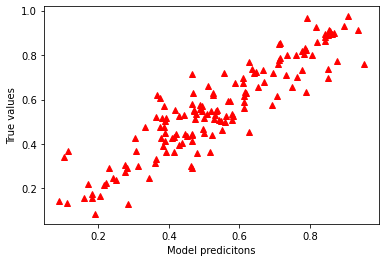

In [60]:
plt.plot(Y_test, y_predict, "^", color ='r')
plt.xlabel('Model predicitons')
plt.ylabel('True values')

In [61]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(Y_test)

Text(0, 0.5, 'True values')

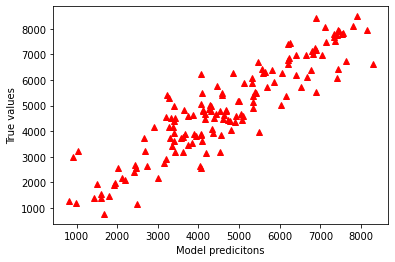

In [62]:
plt.plot(y_test_orig, y_predict_orig, "^", color ='r')
plt.xlabel('Model predicitons')
plt.ylabel('True values')

In [63]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

mae=mean_absolute_error(y_test_orig, y_predict_orig)
mape = mean_absolute_percentage_error(y_test_orig, y_predict_orig)
mse= mean_squared_error(y_test_orig, y_predict_orig)
rmse = sqrt(mse)
r2 = r2_score(y_test_orig, y_predict_orig) # Fornece indicação de qualidade do modelo.  Melhor valor é 1
k = X_test.shape[1]
n = len(X_test)
r2_ajustado = 1 - (1 - r2) * (n - 1) / (n  - k - 1) # Se R2_ajustado é menor, indica que existem variaveis "insignificantes". Do contrário também.

print("MAE: ", mae, "\nMAPE: ", mape, "\nMSE: ", mse, "\nRMSE: ", rmse, "\nR2: ", r2, "\nR2 Adj: ", r2_ajustado)

MAE:  612.7206840255634 
MAPE:  0.17207953409505683 
MSE:  633252.2081641606 
RMSE:  795.7714547306662 
R2:  0.7962141072780928 
R2 Adj:  0.7319572942576716
